In [1]:
import pandas as pd
import seaborn as sns
#from sklearn import set_config
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Configurações

seed = 42
#set_config(transform_output = "pandas")
sns.set_style("darkgrid")


# Load Data

In [3]:
nba       = pd.read_csv('../data/nba/nba_salaries.csv')
insurance = pd.read_csv('../data/insurance/insurance.csv')
airline   = pd.read_csv('../data/airline/train.csv')
airbnb    = pd.read_csv('../data/airbnb/listings.csv')

# Funções

In [27]:
def univariate_statistics(df : pd.DataFrame, round_to: int = 3) -> pd.DataFrame:
    '''
    Função para calcular estatśticas importantes dos dados no dataframe passado como input

    Args:
        df (pd.DataFrame): Dataframe com os dados a serem analisados
        round (int) : Número de casas decimais a serem mantidas nas estatísticas calculadas 
    Returns
        output_df: pd.DataFrame com as estatísticas calculadas
        As estatísticas calculadas são as seguintes:
                            
            type  : datatype da coluna
            count  : número de valores na coluna
            missing : número de valores ausentes na coluna
            unique : número de valores únicos na coluna
            mode : valor mais frequente na coluna
            min : valor mínimo na coluna    
            q1 : primeiro quartil
            median : mediana
            q3 : terceiro quartil
            max : valor máximo na coluna
            mean : média
            std : desvio padrão
            skew : assimetria
            kurtosis : curtose 
    '''


    output_df = pd.DataFrame(columns = ['feature','type', 'count', 'missing', 
                                        'unique', 'mode', 'min', 'q1',
                                        'median', 'q3', 'max', 'mean', 'std',
                                        'skew', 'kurtosis'])
    output_df.set_index('feature', inplace = True)
    for col in df.columns :
        #calcular métricas que se aplicam a todos os tipos de dados
        dtype = df[col].dtype
        count = df[col].count()
        missing = df[col].isna().sum()
        unique = df[col].nunique()
        mode = df[col].mode()[0]

        if pd.api.types.is_numeric_dtype(df[col]):
            #calcular métricas se que se aplicam somente a variáveis numéricas
            min = df[col].min().round(round_to)
            q1 = df[col].quantile(0.25)
            median = df[col].median()
            q3 = df[col].quantile(0.75)
            max = df[col].max()
            mean_ = df[col].mean().round(round_to)
            std_ = df[col].std().round(round_to)
            skew = df[col].skew().round(round_to)
            kurtosis = df[col].kurtosis().round(round_to)

        else:
            min = '-'
            q1 = '-'
            median = '-'
            q3 = '-'
            max = '-'
            mean_ = '-'
            std_ = '-'
            skew = '-'
            kurtosis = '-'   

        output_df.loc[col] = [dtype, count, missing, unique,
                              mode, min, q1, median, q3, max,        
                              mean_, std_, skew, kurtosis]

    return output_df



      

In [28]:
def plotar_histograms_countplots(df):

    '''
    Função para plotar histogramaspara variáveis numéricas e gráficos de contagem para variáveis categóricas

    Args:
        df (pd.DataFrame): Dataframe com os dados a serem analisados
    '''
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            plt.title(col)
            sns.histplot(df[col], stat = 'density')
        else:
            plt.title(col)
            sns.countplot(data = df, x = df[col])
            if df[col].nunique() > 10:
                plt.xticks(rotation = 90)
        plt.show()

In [29]:
x = univariate_statistics(nba)

In [30]:
x

,type,count,missing,unique,mode,min,q1,median,q3,max,mean,std,skew,kurtosis
feature,,,,,,,,,,,,,,
Unnamed: 0,int64,467,0,467,0,0,116.5,233.0,349.5,466,233.0,134.956,0.0,-1.2
Player Name,object,467,0,467,AJ Griffin,-,-,-,-,-,-,-,-,-
Salary,int64,467,0,354,508891,5849,1782621.0,3722040.0,10633543.5,48070014,8416598.747,10708118.047,1.842,2.656
Position,object,467,0,9,SG,-,-,-,-,-,-,-,-,-
Age,int64,467,0,22,23,19,23.0,25.0,29.0,42,25.82,4.275,0.712,0.069
Team,object,467,0,75,SAC,-,-,-,-,-,-,-,-,-
GP,int64,467,0,80,67,1,31.0,55.0,68.5,83,48.233,24.808,-0.524,-1.005
GS,int64,467,0,79,0,0,1.0,8.0,45.5,83,22.651,27.095,0.882,-0.827
MP,float64,467,0,255,5.6,1.8,12.5,19.2,28.3,41.0,19.871,9.549,0.099,-1.062


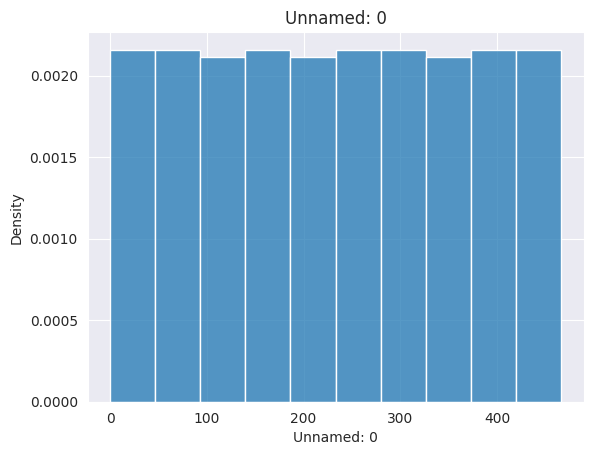

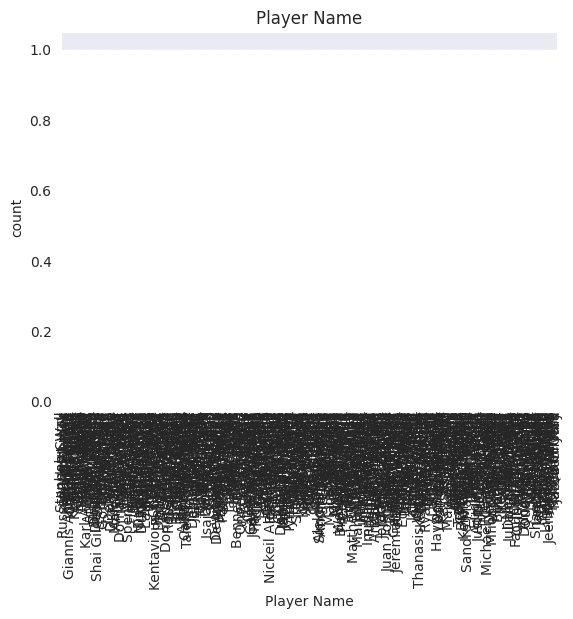

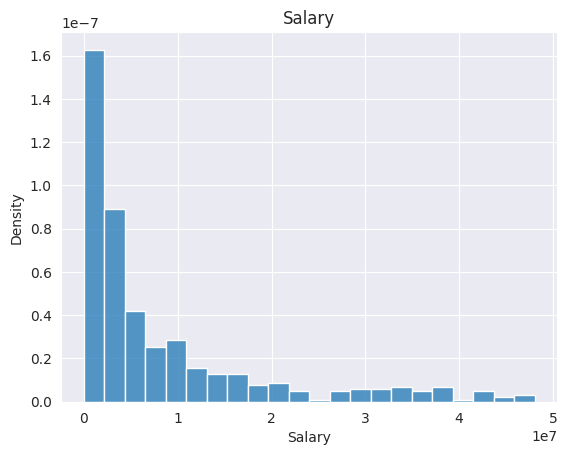

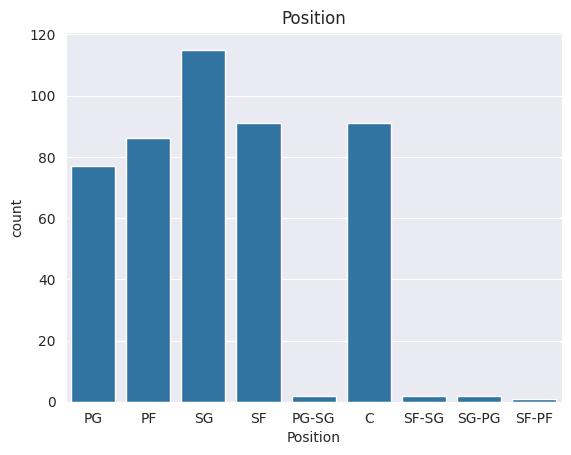

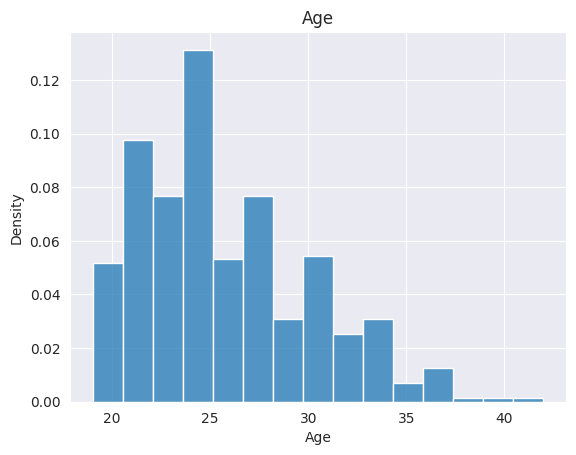

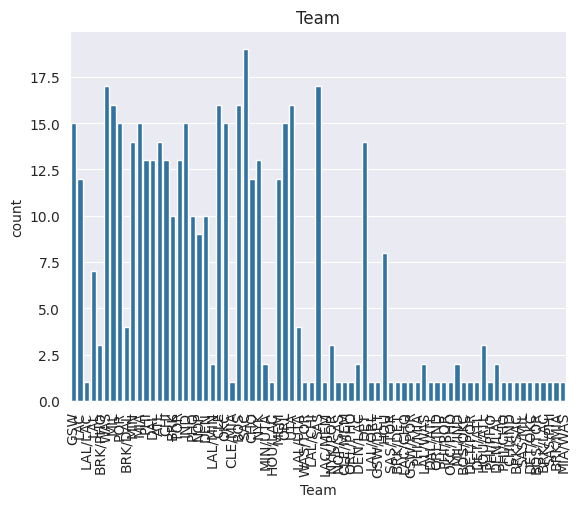

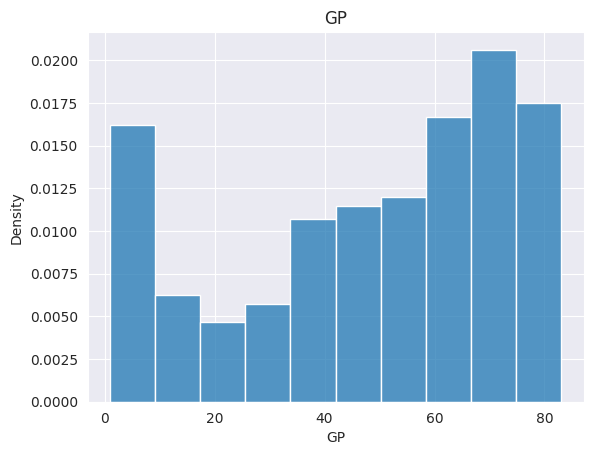

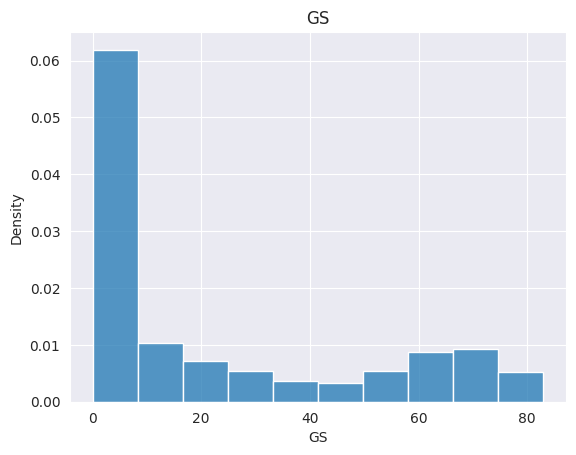

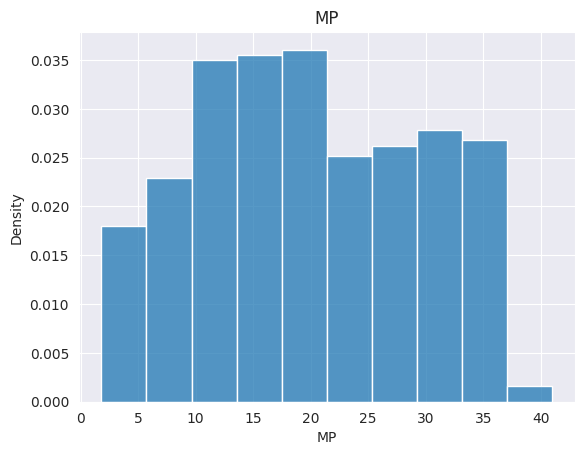

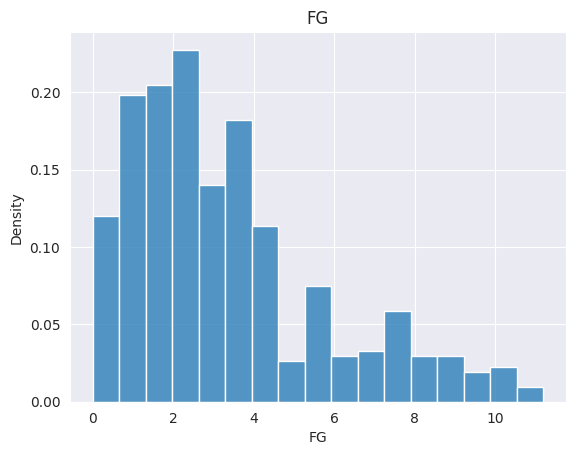

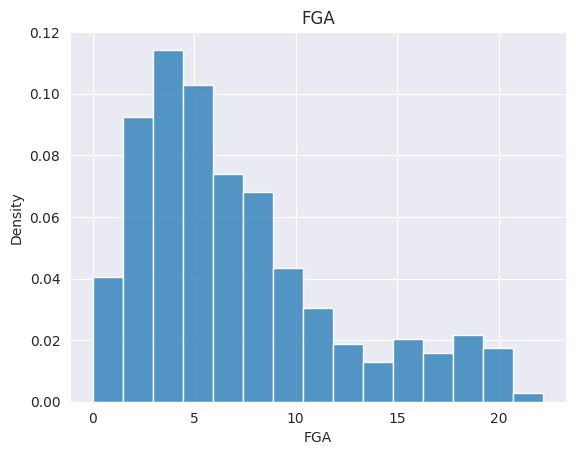

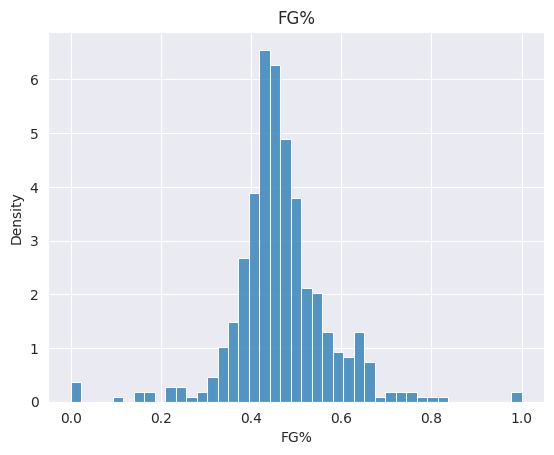

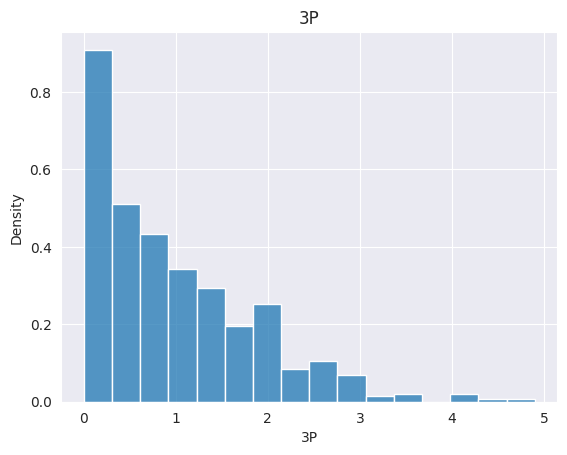

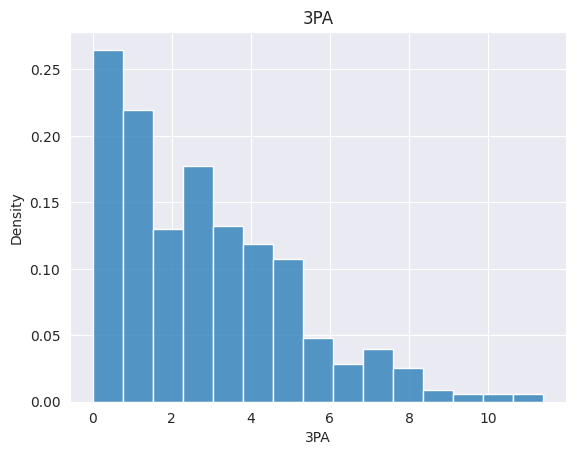

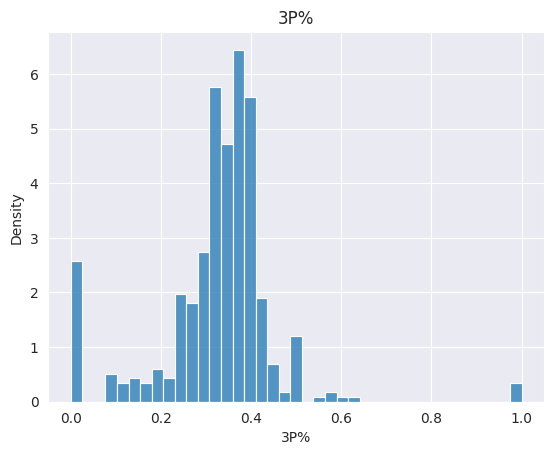

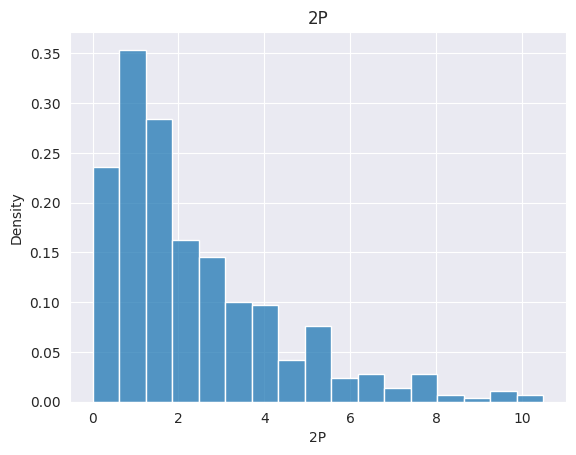

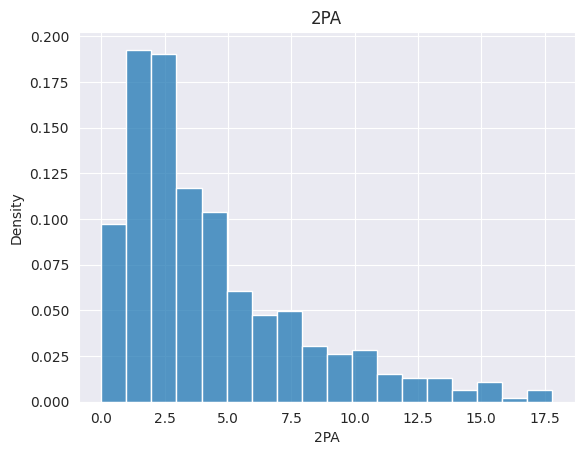

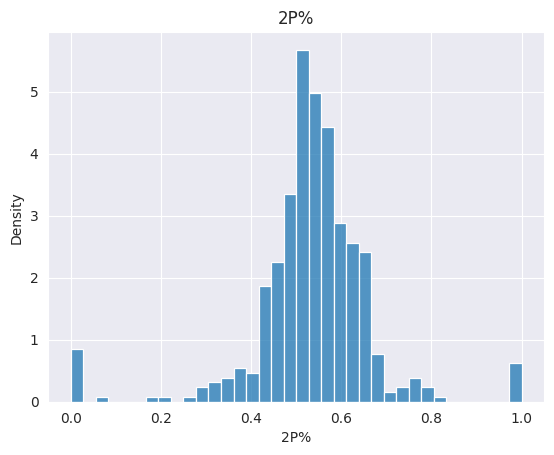

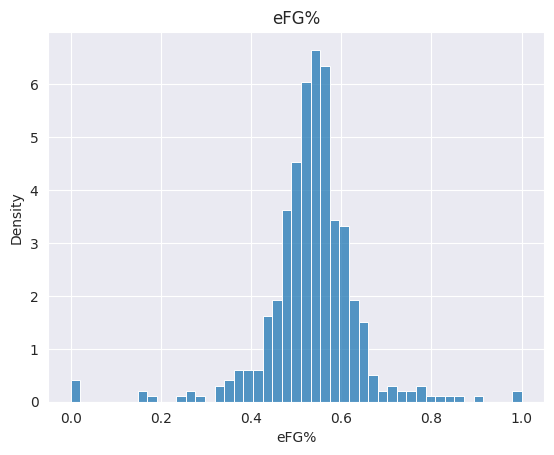

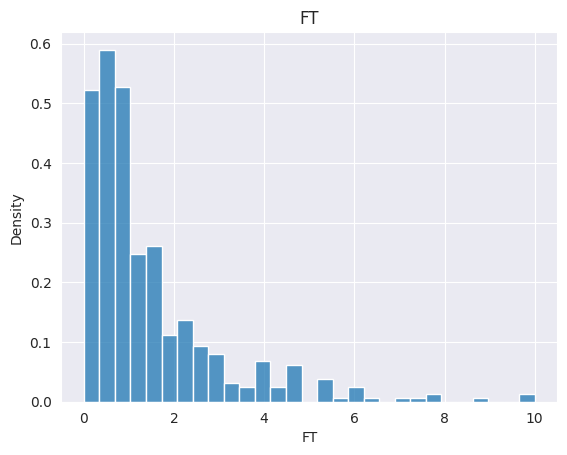

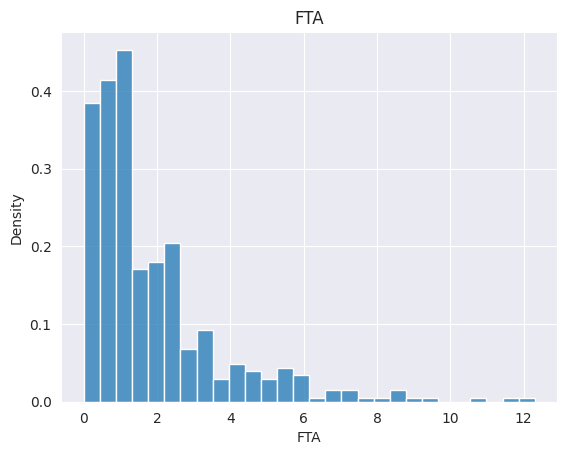

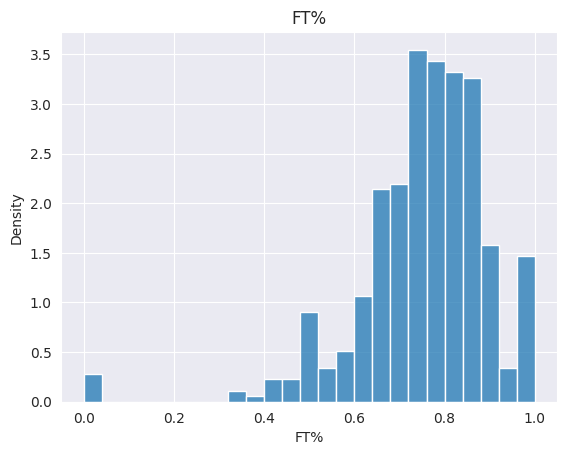

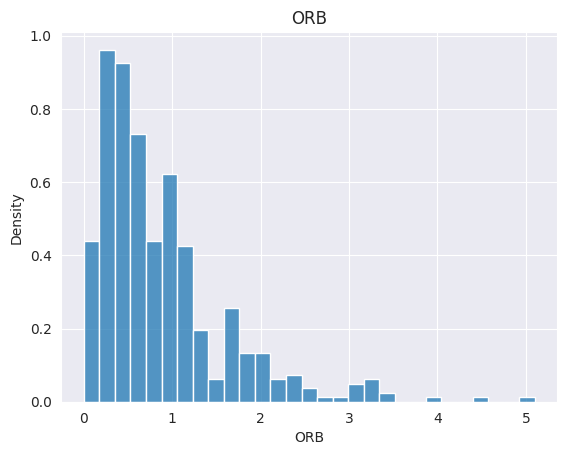

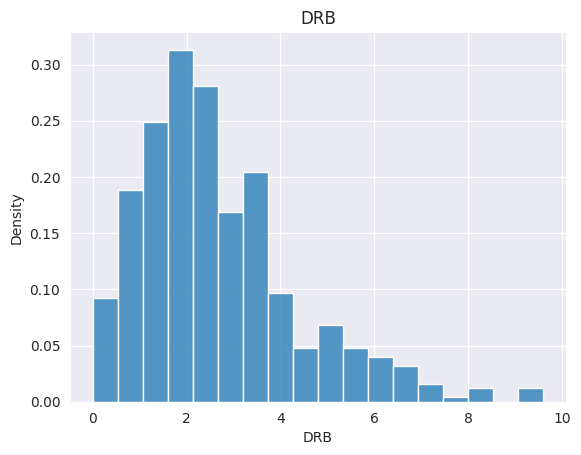

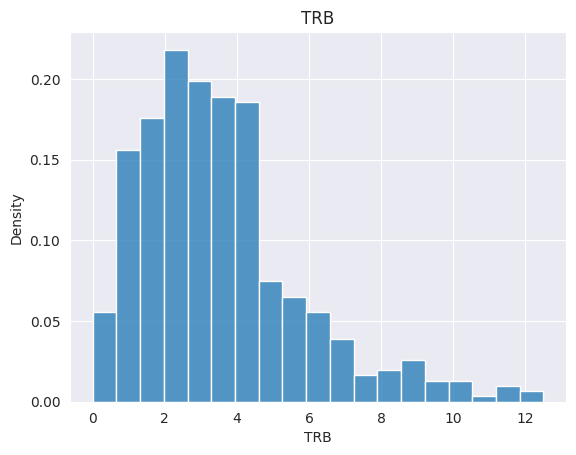

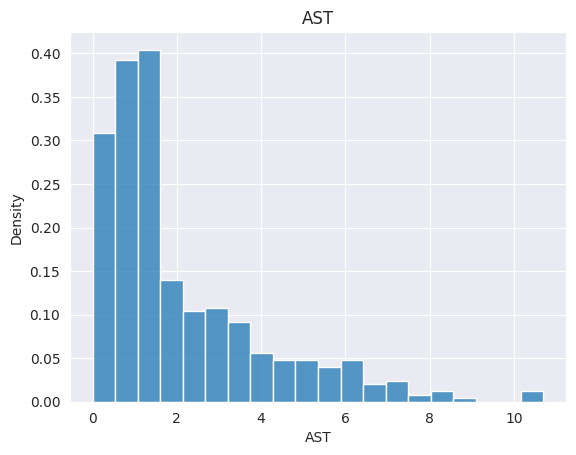

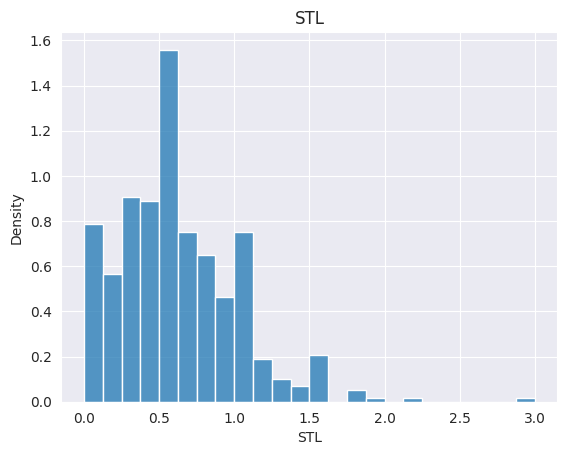

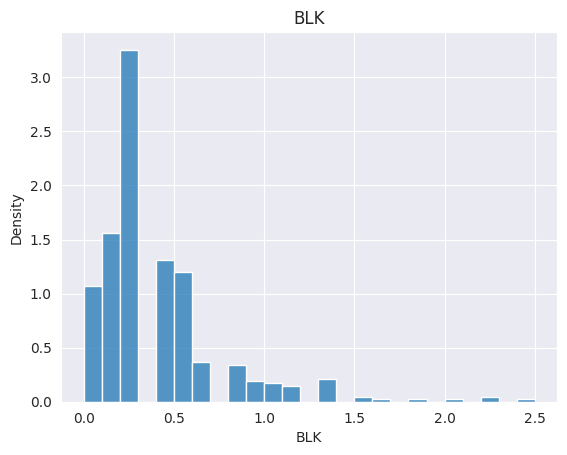

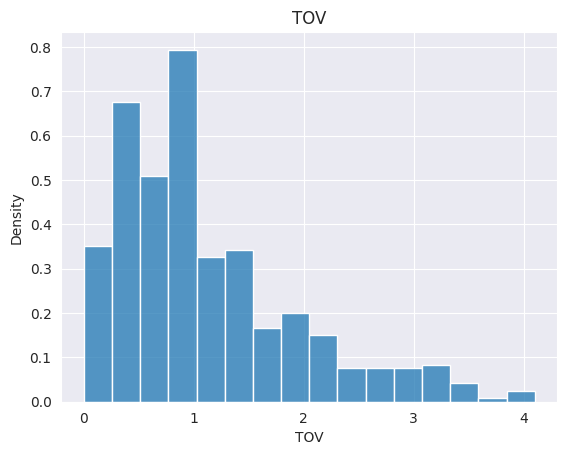

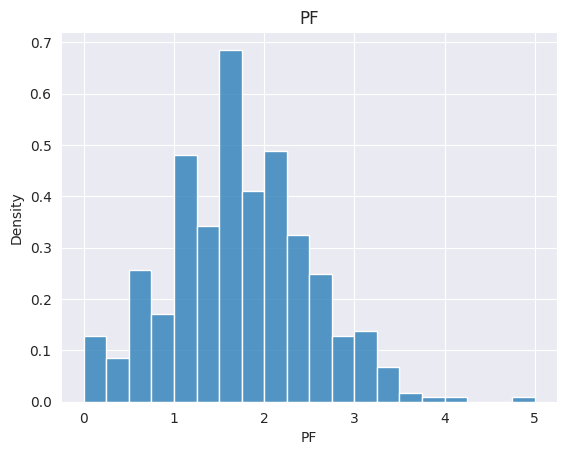

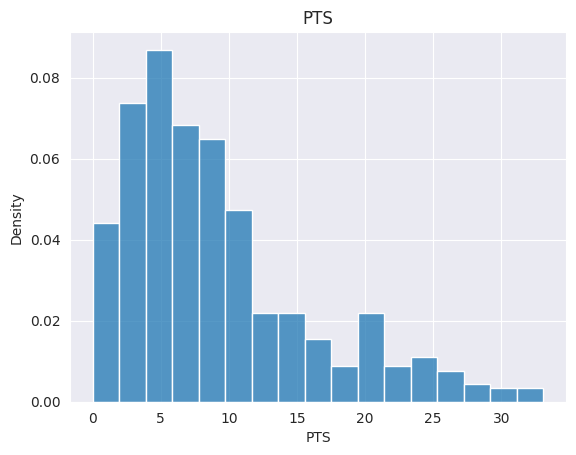

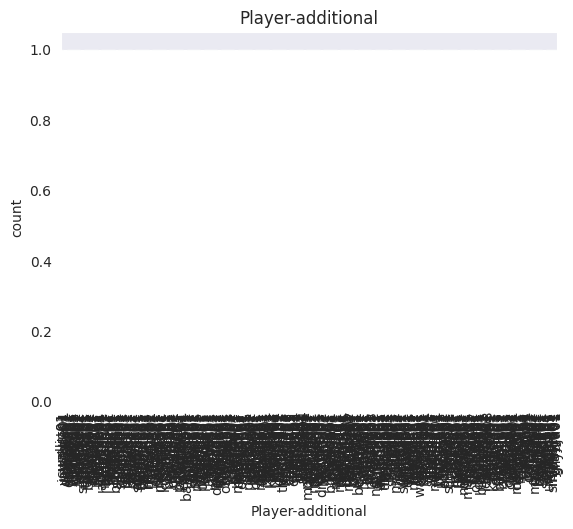

In [19]:
plotar_histograms_countplots(nba)